In [23]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sb
from pandas import read_excel, DataFrame, melt
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd

In [24]:
origin = read_excel('https://data.hossam.kr/G02/wine.xlsx')
origin.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = origin.iloc[:,:-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

#스케일링 변환 된 값을 데이터프레임에 반영
origin.iloc[:,:-1] = df_scaled[:,:]
origin.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0


In [26]:
from sklearn.model_selection import train_test_split
x_data = origin.loc[:,'alcohol':'flavanoids']
y_data = origin.loc[:,'class']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=20)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(142, 7) (142,)
(36, 7) (36,)


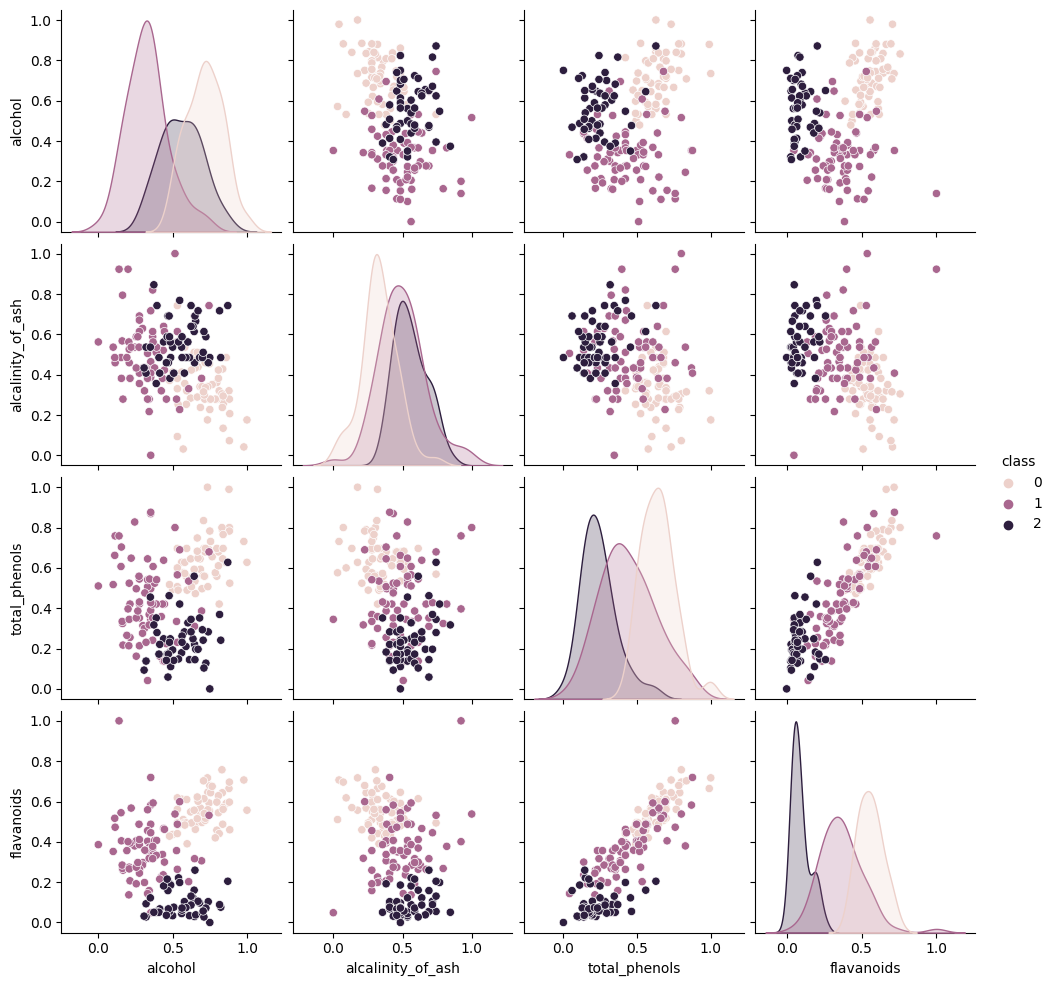

In [27]:
import seaborn as sns
sns.pairplot(vars=["alcohol", "alcalinity_of_ash", "total_phenols", "flavanoids"], 
             hue="class", data=origin)
plt.show()

In [28]:
def singleML(modelName, train_x, train_y, test_x, test_y, cv=5, **kargs):
    # 모델 구축
    model = modelName( **kargs)
    # 학습
    model.fit(train_x, train_y)
    # 훈련 점수
    train_scores = cross_val_score(model, train_x, train_y, cv=cv).mean()
    # 각 훈련 회차별 점수표
    score_df = pd.DataFrame(cross_validate(model, train_x, train_y, cv=5))
    # 검증 데이터에 대한 예측치 생성
    y_pred = model.predict(test_x)
    # 예측치에 대한 정확도 점수
    test_scores = accuracy_score(test_y, y_pred)
    # 리턴
    return [model, train_scores, test_scores, score_df]

In [29]:
ml_list = [LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, SVC]
ml_list

[sklearn.linear_model._logistic.LogisticRegression,
 sklearn.neighbors._classification.KNeighborsClassifier,
 sklearn.tree._classes.DecisionTreeClassifier,
 sklearn.svm._classes.SVC]

In [49]:
scores = []

x_train_df = DataFrame(x_train, columns=x_train.columns)
x_test_df = DataFrame(x_test, columns=x_train.columns)

base_model = DecisionTreeClassifier(random_state=42)  # 기본 모델 설정
bagging_model = BaggingClassifier(base_model, random_state=42)

for ml in ml_list:
    _, train_score, test_score, _ = singleML(
    modelName = BaggingClassifier,
    train_x = x_train_df,
    train_y = y_train,
    test_x = x_test_df,
    test_y = y_test,
    base_estimator=ml(),
    n_estimators=50,
    #max_samples=1, # KNN, SVM과 충돌
    bootstrap=True,
    random_state=777,
    bootstrap_features=False,
    n_jobs=-1)
    # 탐색할 하이퍼파라미터 그리드를 정의합니다.
    param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],  # 트리 개수를 다양하게 시도
    'max_samples': [0.5, 0.7, 1.0, 1.2],    # 각 트리에서 사용할 샘플의 비율
    'max_features': [0.5, 0.7, 1.0, 1.2],   # 각 트리에서 사용할 특성의 비율
    'base_estimator__criterion': ['gini', 'entropy'],  # 기본 모델의 criterion
    'base_estimator__max_depth': [None, 10, 20, 30],       # 기본 모델의 최대 깊이
    }
    scores.append({
    "name": ml.__name__, "train_score": train_score,
    "test_score": test_score})
    grid_search = GridSearchCV(bagging_model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(x_train, y_train)
    best_params = grid_search.best_params_
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
print("최적 하이퍼파라미터:", best_params)
print("최적 모델의 테스트 정확도:", accuracy)
df = DataFrame(scores)
df

최적 하이퍼파라미터: {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10}
최적 모델의 테스트 정확도: 0.9166666666666666


,name,train_score,test_score
0,LogisticRegression,0.922167,0.972222
1,KNeighborsClassifier,0.894089,0.916667
2,DecisionTreeClassifier,0.928818,0.944444
3,SVC,0.922414,0.972222


In [43]:
df2 = melt(df, id_vars=['name'], value_vars=['train_score', 'test_score'],
var_name='type', value_name='score')
df2

,name,type,score
0,LogisticRegression,train_score,0.922167
1,KNeighborsClassifier,train_score,0.894089
2,DecisionTreeClassifier,train_score,0.928818
3,SVC,train_score,0.922414
4,LogisticRegression,test_score,0.972222
5,KNeighborsClassifier,test_score,0.916667
6,DecisionTreeClassifier,test_score,0.944444
7,SVC,test_score,0.972222


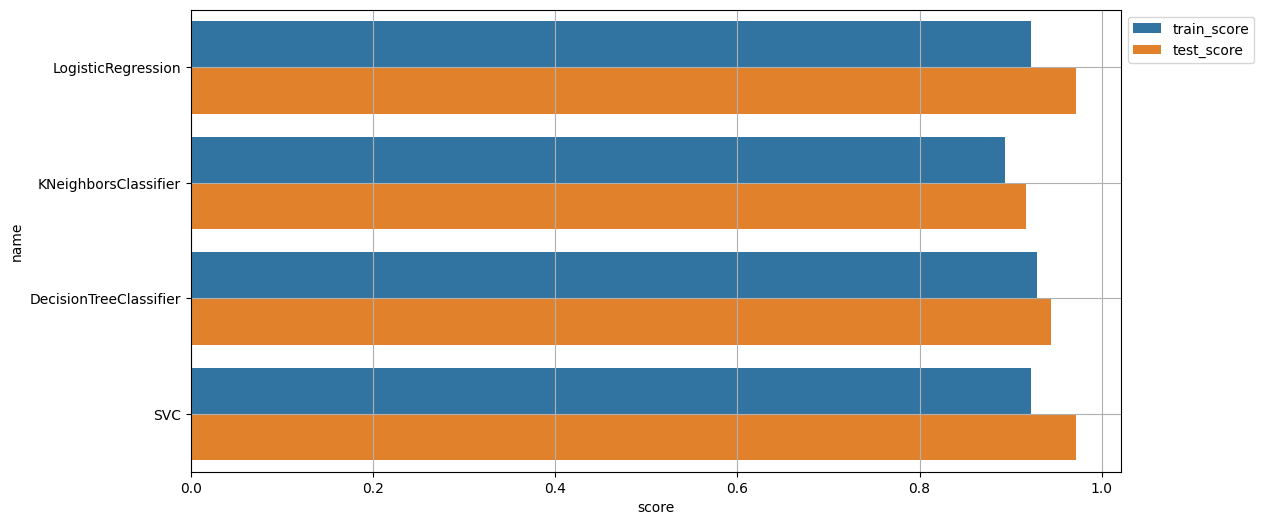

In [44]:
plt.figure(figsize=(12, 6))
sb.barplot(y='name', x='score', hue='type', data=df2)
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.show()
plt.close()

In [1]:
pip install scikit-learn-intelex

  Obtaining dependency information for scikit-learn-intelex from https://files.pythonhosted.org/packages/c4/cb/dbb84fa0f32990950da461c7c7d02d4ac14f72dd7314626a8d089c2d3dc8/scikit_learn_intelex-2023.2.1-py311-none-win_amd64.whl.metadata
  Obtaining dependency information for daal4py==2023.2.1 from https://files.pythonhosted.org/packages/0a/82/5e690b960c667f130d17a7028394d0ee228799225a115b19744e86c8b6d2/daal4py-2023.2.1-py311-none-win_amd64.whl.metadata
  Obtaining dependency information for daal==2023.2.1 from https://files.pythonhosted.org/packages/07/13/e81da0d45726a70e0c29b205436538aee765de2aeeed4e4cbd13d8a9bf38/daal-2023.2.1-py2.py3-none-win_amd64.whl.metadata
  Obtaining dependency information for tbb==2021.* from https://files.pythonhosted.org/packages/c7/7b/b6c8236c5fa4f2a3b5cfc27520178fec7cc00679fa040405d911db717310/tbb-2021.10.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/139.3 kB ? eta -:--:--
   ---------------------------------------- 139.


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install daal4py

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install dpcpp_cpp_rt

  Obtaining dependency information for dpcpp_cpp_rt from https://files.pythonhosted.org/packages/49/2e/cdaf03a7783d6d1c09660775cb024ed82d234feb59ff40d64d389241bfa8/dpcpp_cpp_rt-2023.2.2-py2.py3-none-win_amd64.whl.metadata
  Obtaining dependency information for intel-openmp==2023.2.2 from https://files.pythonhosted.org/packages/94/a1/550f60452635a474d8d732a58f16a854bc10e8d162b1e761d02800a45825/intel_openmp-2023.2.2-py2.py3-none-win_amd64.whl.metadata
  Obtaining dependency information for intel-opencl-rt==2023.2.2 from https://files.pythonhosted.org/packages/51/78/9aa86e88f0a588c41803e0e54c42f07ec9af5bac43c08f589431ab9d264f/intel_opencl_rt-2023.2.2-py2.py3-none-win_amd64.whl.metadata
  Obtaining dependency information for intel-cmplr-lic-rt==2023.2.2 from https://files.pythonhosted.org/packages/cc/5a/9365ffa368ec388091a3dc31ec3397cadc346ec6ed6dccc5d53ea22e0e28/intel_cmplr_lic_rt-2023.2.2-py2.py3-none-win_amd64.whl.metadata
  Obtaining dependency information for intel-cmplr-lib-rt==2023.


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sb
from pandas import read_excel, DataFrame, melt
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
# 기본참조
from sklearnex import patch_sklearn
# Gpu 사용 가능한지 참조
from daal4py.oneapi import sycl_context
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
